In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from collections import Counter

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
def Normalize_data(df):
  columns_to_normalize = [col for col in df.columns if df[col].nunique() > 10]
  # Standardization (Z-score normalization)
  scaler = StandardScaler()
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
  return df

In [ ]:
def Apply_SMOTE_NC(df):
  # Separate features and target
  X = df.drop('Attrition', axis=1)
  y = df['Attrition']

  # Identify the indices of categorical features
  categorical_features = [col for col in X.columns if X[col].nunique() < 10]

  # Apply SMOTENC to the training data
  smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
  X_res_smote_nc, y_res_smote_nc = smote_nc.fit_resample(X, y)

  # Check the class distribution after SMOTENC
  print(f"Resampled class distribution (SMOTENC): {Counter(y_res_smote_nc)}")
  df = pd.concat([X_res_smote_nc, y_res_smote_nc], axis=1)
  return df

In [ ]:
def Train_model(train_df, test_df):
  X_train = train_df.drop('Attrition', axis=1)
  y_train = train_df['Attrition']

  X_test = test_df.drop('Attrition', axis=1)
  y_test = test_df['Attrition']

  # Split the data into training and testing sets
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  # Define the models
  models = {
      'Logistic Regression': LogisticRegression(),
      'SVM': SVC(probability=True),  # Enable probability estimates for ROC-AUC
      'KNN': KNeighborsClassifier(),
      'Decision Tree': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Gradient Boosting': GradientBoostingClassifier(),
      'Ada Boost': AdaBoostClassifier(),
      'XGBoost': XGBClassifier(),
      'LightGBM': LGBMClassifier(),
      'CatBoost': CatBoostClassifier(verbose=0)
  }

  # Train and evaluate each model
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      print(f"--- {name} ---")
      print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
      print(classification_report(y_test, y_pred))

      # Confusion Matrix
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")
      print(cm)

      # ROC-AUC
      y_pred_proba = model.predict_proba(X_test)[:, 1]
      roc_auc = roc_auc_score(y_test, y_pred_proba)
      print(f"ROC-AUC: {roc_auc}")

      # ROC Curve
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
      plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

  # Plot ROC Curve
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

# Intra Training

## Small (Watson) Dataset

In [ ]:
train_df = pd.read_csv('/content/small_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed.csv')

In [ ]:
train_df = Apply_SMOTE_NC(train_df)

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


In [ ]:
small_train_df = Normalize_data(train_df)
small_test_df = Normalize_data(test_df)

--- Logistic Regression ---
Accuracy: 0.8611111111111112
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       444
         1.0       0.45      0.72      0.55        60

    accuracy                           0.86       504
   macro avg       0.70      0.80      0.73       504
weighted avg       0.90      0.86      0.87       504

Confusion Matrix:
[[391  53]
 [ 17  43]]
ROC-AUC: 0.9001689189189188
--- SVM ---
Accuracy: 0.8591269841269841
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       444
         1.0       0.44      0.73      0.55        60

    accuracy                           0.86       504
   macro avg       0.70      0.80      0.73       504
weighted avg       0.90      0.86      0.87       504

Confusion Matrix:
[[389  55]
 [ 16  44]]
ROC-AUC: 0.9029091591591591
--- KNN ---
Accuracy: 0.7440476190476191
              precision    recall  f1-score   support

         0.0  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- XGBoost ---
Accuracy: 0.8670634920634921
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       444
         1.0       0.47      0.85      0.60        60

    accuracy                           0.87       504
   macro avg       0.72      0.86      0.76       504
weighted avg       0.92      0.87      0.88       504

Confusion Matrix:
[[386  58]
 [  9  51]]
ROC-AUC: 0.9234421921921923
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1033, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 2066, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -

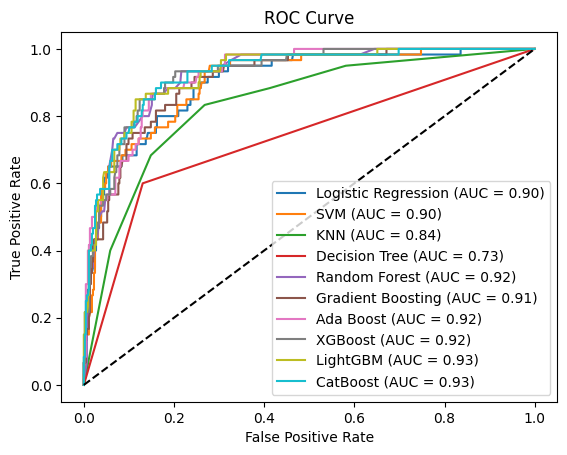

In [ ]:
Train_model(train_df, test_df)

## Large (IBM) Dataset

In [ ]:
train_df = pd.read_csv('/content/large_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed.csv')

In [ ]:
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)

--- Logistic Regression ---
Accuracy: 0.7406759906759907
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1774
         1.0       0.74      0.72      0.73      1658

    accuracy                           0.74      3432
   macro avg       0.74      0.74      0.74      3432
weighted avg       0.74      0.74      0.74      3432

Confusion Matrix:
[[1352  422]
 [ 468 1190]]
ROC-AUC: 0.823348718862323
--- SVM ---
Accuracy: 0.7395104895104895
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      1774
         1.0       0.74      0.71      0.72      1658

    accuracy                           0.74      3432
   macro avg       0.74      0.74      0.74      3432
weighted avg       0.74      0.74      0.74      3432

Confusion Matrix:
[[1361  413]
 [ 481 1177]]
ROC-AUC: 0.8274644271972997
--- KNN ---
Accuracy: 0.6756993006993007
              precision    recall  f1-score   support

       

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- Ada Boost ---
Accuracy: 0.7523310023310024
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76      1774
         1.0       0.75      0.74      0.74      1658

    accuracy                           0.75      3432
   macro avg       0.75      0.75      0.75      3432
weighted avg       0.75      0.75      0.75      3432

Confusion Matrix:
[[1360  414]
 [ 436 1222]]
ROC-AUC: 0.8398526905863137
--- XGBoost ---
Accuracy: 0.7319347319347319
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74      1774
         1.0       0.73      0.72      0.72      1658

    accuracy                           0.73      3432
   macro avg       0.73      0.73      0.73      3432
weighted avg       0.73      0.73      0.73      3432

Confusion Matrix:
[[1326  448]
 [ 472 1186]]
ROC-AUC: 0.820709062548023
[LightGBM] [Info] Number of positive: 6454, number of negative: 7188
[LightGBM] [Info] Auto-choosing row-wise

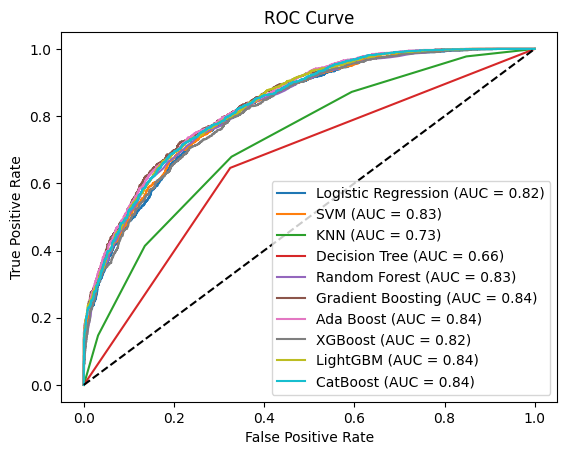

In [ ]:
Train_model(train_df, test_df)

# Inter Training

## Large Train, Small Test

In [ ]:
train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')

--- Logistic Regression ---
Accuracy: 0.6964285714285714
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80       444
         1.0       0.27      0.88      0.41        60

    accuracy                           0.70       504
   macro avg       0.62      0.78      0.60       504
weighted avg       0.89      0.70      0.75       504

Confusion Matrix:
[[298 146]
 [  7  53]]
ROC-AUC: 0.8337650150150151
--- SVM ---
Accuracy: 0.7341269841269841
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       444
         1.0       0.28      0.78      0.41        60

    accuracy                           0.73       504
   macro avg       0.62      0.76      0.62       504
weighted avg       0.88      0.73      0.78       504

Confusion Matrix:
[[323 121]
 [ 13  47]]
ROC-AUC: 0.820777027027027
--- KNN ---
Accuracy: 0.6825396825396826
              precision    recall  f1-score   support

         0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- Ada Boost ---
Accuracy: 0.7242063492063492
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82       444
         1.0       0.28      0.85      0.42        60

    accuracy                           0.72       504
   macro avg       0.63      0.78      0.62       504
weighted avg       0.89      0.72      0.77       504

Confusion Matrix:
[[314 130]
 [  9  51]]
ROC-AUC: 0.8323948948948949
--- XGBoost ---
Accuracy: 0.6726190476190477
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78       444
         1.0       0.23      0.77      0.36        60

    accuracy                           0.67       504
   macro avg       0.59      0.71      0.57       504
weighted avg       0.87      0.67      0.73       504

Confusion Matrix:
[[293 151]
 [ 14  46]]
ROC-AUC: 0.7949136636636636
[LightGBM] [Info] Number of positive: 6454, number of negative: 7188
[LightGBM] [Info] Auto-choosing row-wise multi-

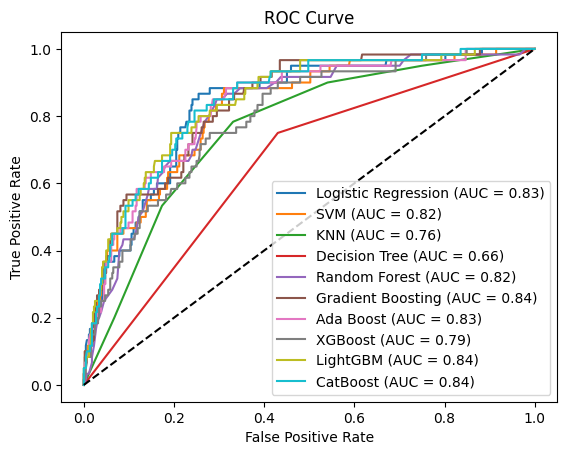

In [ ]:
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_model(train_df, test_df)

## Small Train, Large Test

In [ ]:
train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')

In [ ]:
train_df = Apply_SMOTE_NC(train_df)

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


--- Logistic Regression ---
Accuracy: 0.6139277389277389
              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67      1774
         1.0       0.64      0.45      0.53      1658

    accuracy                           0.61      3432
   macro avg       0.62      0.61      0.60      3432
weighted avg       0.62      0.61      0.60      3432

Confusion Matrix:
[[1355  419]
 [ 906  752]]
ROC-AUC: 0.6628165445661295
--- SVM ---
Accuracy: 0.5964452214452215
              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68      1774
         1.0       0.65      0.35      0.46      1658

    accuracy                           0.60      3432
   macro avg       0.62      0.59      0.57      3432
weighted avg       0.61      0.60      0.57      3432

Confusion Matrix:
[[1466  308]
 [1077  581]]
ROC-AUC: 0.6395718276186111
--- KNN ---
Accuracy: 0.5976107226107226
              precision    recall  f1-score   support

      

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- XGBoost ---
Accuracy: 0.5897435897435898
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.66      1774
         1.0       0.62      0.39      0.48      1658

    accuracy                           0.59      3432
   macro avg       0.60      0.58      0.57      3432
weighted avg       0.60      0.59      0.57      3432

Confusion Matrix:
[[1376  398]
 [1010  648]]
ROC-AUC: 0.6186177706939672
[LightGBM] [Info] Number of positive: 1033, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 2066, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Accuracy: 0.5798368298368298
          

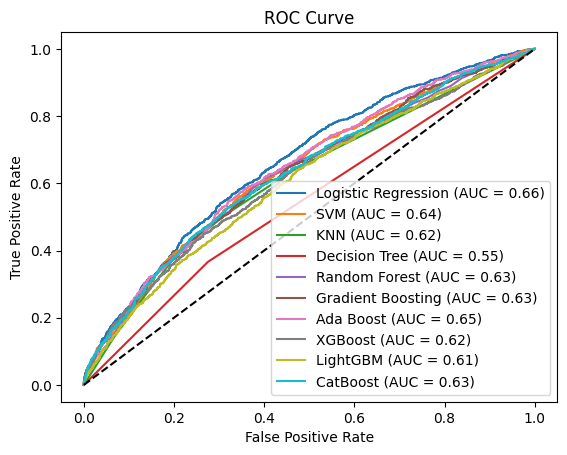

In [ ]:
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_model(train_df, test_df)

# Hybrid Training

In [ ]:
large_train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
large_test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')

small_train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
small_test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')

In [ ]:
small_train_df = Apply_SMOTE_NC(small_train_df)

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


In [ ]:
train_df = pd.concat([large_train_df, small_train_df], axis=0)
test_df = pd.concat([large_test_df, small_test_df], axis=0)

--- Logistic Regression ---
Accuracy: 0.7217987804878049
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      2218
         1.0       0.68      0.68      0.68      1718

    accuracy                           0.72      3936
   macro avg       0.72      0.72      0.72      3936
weighted avg       0.72      0.72      0.72      3936

Confusion Matrix:
[[1674  544]
 [ 551 1167]]
ROC-AUC: 0.7871304576483444
--- SVM ---
Accuracy: 0.7253556910569106
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76      2218
         1.0       0.70      0.65      0.67      1718

    accuracy                           0.73      3936
   macro avg       0.72      0.72      0.72      3936
weighted avg       0.72      0.73      0.72      3936

Confusion Matrix:
[[1746  472]
 [ 609 1109]]
ROC-AUC: 0.7977431712803803
--- KNN ---
Accuracy: 0.6892784552845529
              precision    recall  f1-score   support

      

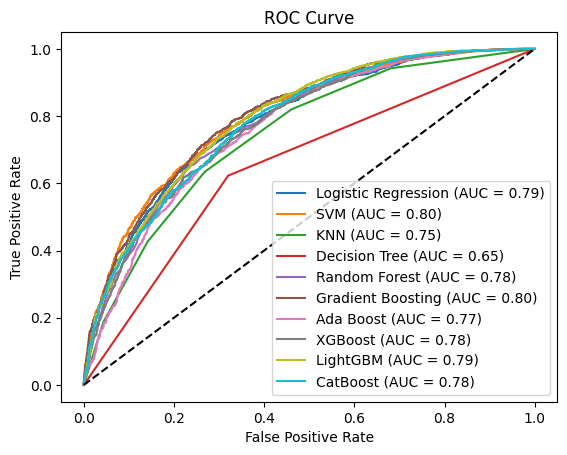

In [ ]:
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_model(train_df, test_df)

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00


Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.79874 | val_0_auc: 0.54805 |  0:00:00s
epoch 1  | loss: 0.63844 | val_0_auc: 0.55471 |  0:00:00s
epoch 2  | loss: 0.57519 | val_0_auc: 0.58947 |  0:00:00s
epoch 3  | loss: 0.53322 | val_0_auc: 0.51717 |  0:00:00s
epoch 4  | loss: 0.49115 | val_0_auc: 0.51804 |  0:00:01s
epoch 5  | loss: 0.47505 | val_0_auc: 0.50323 |  0:00:01s
epoch 6  | loss: 0.41495 | val_0_auc: 0.51845 |  0:00:01s
epoch 7  | loss: 0.38457 | val_0_auc: 0.51458 |  0:00:01s
epoch 8  | loss: 0.37593 | val_0_auc: 0.5478  |  0:00:01s
epoch 9  | loss: 0.35912 | val_0_auc: 0.58249 |  0:00:01s
epoch 10 | loss: 0.36098 | val_0_auc: 0.62438 |  0:00:02s
epoch 11 | loss: 0.33868 | val_0_auc: 0.62183 |  0:00:02s
epoch 12 | loss: 0.31807 | val_0_auc: 0.60252 |  0:00:02s
epoch 13 | loss: 0.32337 | val_0_auc: 0.59202 |  0:00:02s
epoch 14 | loss: 0.32244 | val_0_auc: 0.6192  |  0:00:02s
epoch 15 | loss: 0.30164 | val_0_auc: 0.63211 |  0:00:03s
epoch 16 | loss: 0.2858  | val_0_auc: 0.64634 |  0:00:03s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


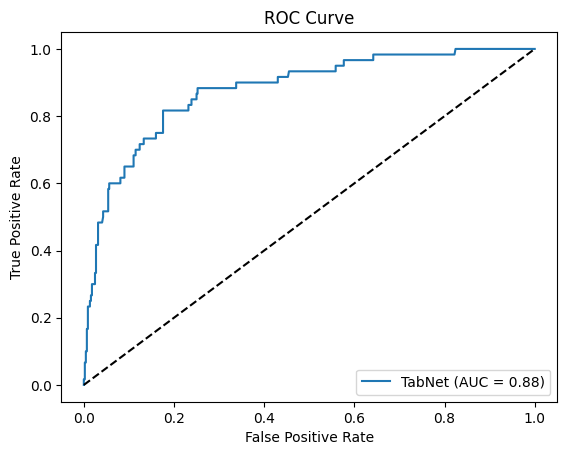

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.65961 | val_0_auc: 0.57181 |  0:00:00s
epoch 1  | loss: 0.60952 | val_0_auc: 0.65225 |  0:00:01s
epoch 2  | loss: 0.58277 | val_0_auc: 0.63641 |  0:00:02s
epoch 3  | loss: 0.56167 | val_0_auc: 0.69858 |  0:00:02s
epoch 4  | loss: 0.55334 | val_0_auc: 0.73708 |  0:00:03s
epoch 5  | loss: 0.55005 | val_0_auc: 0.75873 |  0:00:04s
epoch 6  | loss: 0.54004 | val_0_auc: 0.75491 |  0:00:05s
epoch 7  | loss: 0.53384 | val_0_auc: 0.77125 |  0:00:06s
epoch 8  | loss: 0.52979 | val_0_auc: 0.77758 |  0:00:06s
epoch 9  | loss: 0.52406 | val_0_auc: 0.77909 |  0:00:07s
epoch 10 | loss: 0.51807 | val_0_auc: 0.78772 |  0:00:08s
epoch 11 | loss: 0.51436 | val_0_auc: 0.79998 |  0:00:09s
epoch 12 | loss: 0.5085  | val_0_auc: 0.8042  |  0:00:09s
epoch 13 | loss: 0.50965 | val_0_auc: 0.81167 |  0:00:10s
epoch 14 | loss: 0.50897 | val_0_auc: 0.80713 |  0:00:11s
epoch 15 | loss: 0.50795 | val_0_auc: 0.80884 |  0:00:13s
epoch 16 | loss: 0.50628 | val_0_auc: 0.81129 |  0:00:14s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


--- TabNet ---
Accuracy: 0.7363053613053613
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1774
         1.0       0.76      0.67      0.71      1658

    accuracy                           0.74      3432
   macro avg       0.74      0.73      0.73      3432
weighted avg       0.74      0.74      0.73      3432

Confusion Matrix:
[[1421  353]
 [ 552 1106]]
ROC-AUC: 0.8189817603964515


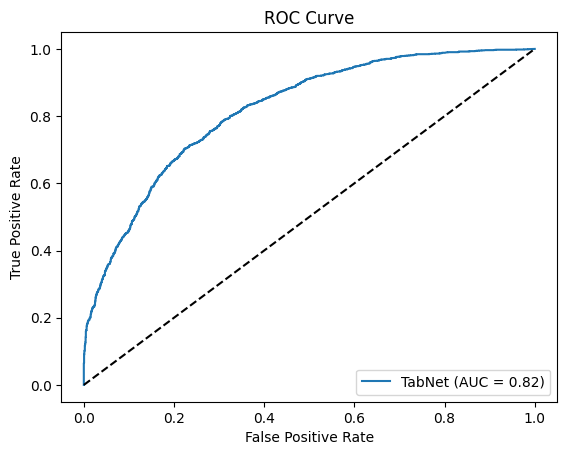

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.76763 | val_0_auc: 0.58181 |  0:00:00s
epoch 1  | loss: 0.638   | val_0_auc: 0.66563 |  0:00:01s
epoch 2  | loss: 0.60857 | val_0_auc: 0.61301 |  0:00:01s
epoch 3  | loss: 0.59569 | val_0_auc: 0.66672 |  0:00:02s
epoch 4  | loss: 0.58568 | val_0_auc: 0.7308  |  0:00:03s
epoch 5  | loss: 0.58356 | val_0_auc: 0.73789 |  0:00:03s
epoch 6  | loss: 0.57611 | val_0_auc: 0.75539 |  0:00:04s
epoch 7  | loss: 0.57048 | val_0_auc: 0.75137 |  0:00:04s
epoch 8  | loss: 0.56883 | val_0_auc: 0.78144 |  0:00:05s
epoch 9  | loss: 0.56907 | val_0_auc: 0.78977 |  0:00:06s
epoch 10 | loss: 0.5687  | val_0_auc: 0.79176 |  0:00:07s
epoch 11 | loss: 0.56546 | val_0_auc: 0.78307 |  0:00:08s
epoch 12 | loss: 0.56689 | val_0_auc: 0.78164 |  0:00:09s
epoch 13 | loss: 0.56174 | val_0_auc: 0.79503 |  0:00:09s
epoch 14 | loss: 0.56212 | val_0_auc: 0.81002 |  0:00:10s
epoch 15 | loss: 0.56308 | val_0_auc: 0.81623 |  0:00:11s
epoch 16 | loss: 0.566   | val_0_auc: 0.79996 |  0:00:11s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


--- TabNet ---
Accuracy: 0.7361111111111112
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       444
         1.0       0.28      0.77      0.41        60

    accuracy                           0.74       504
   macro avg       0.62      0.75      0.62       504
weighted avg       0.88      0.74      0.78       504

Confusion Matrix:
[[325 119]
 [ 14  46]]
ROC-AUC: 0.8172672672672673


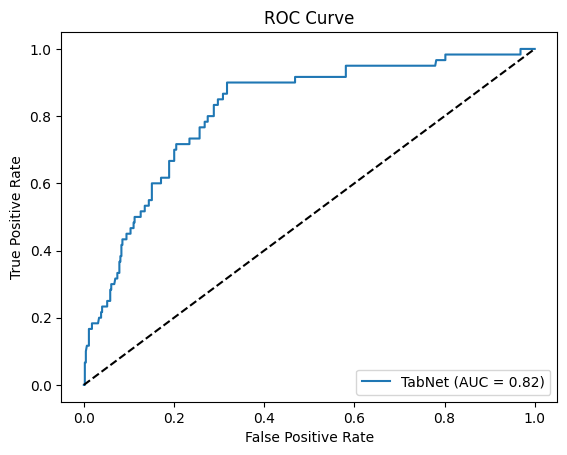

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03672 | val_0_auc: 0.56236 |  0:00:00s
epoch 1  | loss: 0.62295 | val_0_auc: 0.48075 |  0:00:00s
epoch 2  | loss: 0.56086 | val_0_auc: 0.4917  |  0:00:00s
epoch 3  | loss: 0.52858 | val_0_auc: 0.49285 |  0:00:00s
epoch 4  | loss: 0.48449 | val_0_auc: 0.5248  |  0:00:00s
epoch 5  | loss: 0.45359 | val_0_auc: 0.51867 |  0:00:01s
epoch 6  | loss: 0.42608 | val_0_auc: 0.49623 |  0:00:01s
epoch 7  | loss: 0.39476 | val_0_auc: 0.4883  |  0:00:01s
epoch 8  | loss: 0.38981 | val_0_auc: 0.50597 |  0:00:01s
epoch 9  | loss: 0.37311 | val_0_auc: 0.52231 |  0:00:01s
epoch 10 | loss: 0.36275 | val_0_auc: 0.53478 |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56236
--- TabNet ---
Accuracy: 0.5189393939393939
              precision    recall  f1-score   support

         0.0       0.52      0.99      0.68      1774
         1.0       0.58      0.02      0.03      1658

    accuracy                           0.52      3432
   macro avg  

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


ROC-AUC: 0.5623552506857531


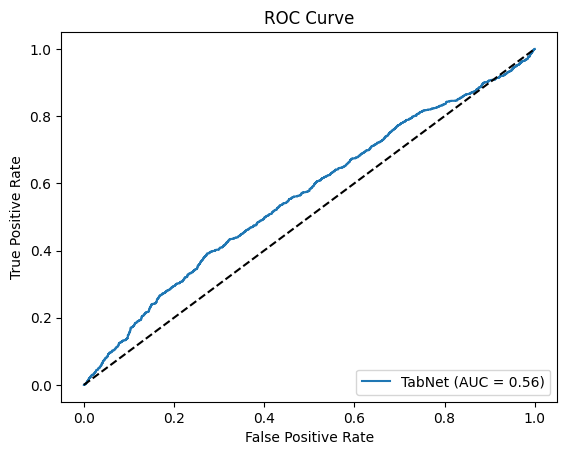

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.7433  | val_0_auc: 0.67867 |  0:00:00s
epoch 1  | loss: 0.60305 | val_0_auc: 0.69979 |  0:00:01s
epoch 2  | loss: 0.58325 | val_0_auc: 0.71664 |  0:00:02s
epoch 3  | loss: 0.57141 | val_0_auc: 0.70895 |  0:00:03s
epoch 4  | loss: 0.56627 | val_0_auc: 0.70529 |  0:00:03s
epoch 5  | loss: 0.56358 | val_0_auc: 0.71829 |  0:00:04s
epoch 6  | loss: 0.56147 | val_0_auc: 0.72007 |  0:00:05s
epoch 7  | loss: 0.55852 | val_0_auc: 0.7356  |  0:00:06s
epoch 8  | loss: 0.556   | val_0_auc: 0.74483 |  0:00:07s
epoch 9  | loss: 0.55453 | val_0_auc: 0.74667 |  0:00:08s
epoch 10 | loss: 0.55299 | val_0_auc: 0.75513 |  0:00:09s
epoch 11 | loss: 0.55131 | val_0_auc: 0.75591 |  0:00:10s
epoch 12 | loss: 0.55282 | val_0_auc: 0.76266 |  0:00:11s
epoch 13 | loss: 0.55232 | val_0_auc: 0.77851 |  0:00:11s
epoch 14 | loss: 0.54983 | val_0_auc: 0.78358 |  0:00:12s
epoch 15 | loss: 0.54895 | val_0_auc: 0.78457 |  0:00:13s
epoch 16 | loss: 0.54835 | val_0_auc: 0.78926 |  0:00:14s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


--- TabNet ---
Accuracy: 0.7245934959349594
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      2218
         1.0       0.71      0.63      0.67      1718

    accuracy                           0.72      3936
   macro avg       0.72      0.71      0.72      3936
weighted avg       0.72      0.72      0.72      3936

Confusion Matrix:
[[1773  445]
 [ 639 1079]]
ROC-AUC: 0.8007564051558262


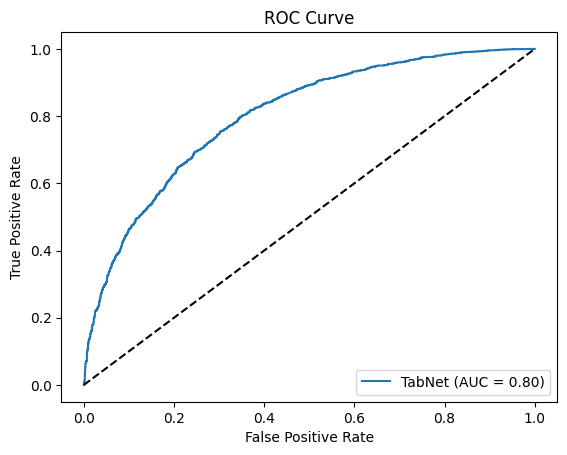

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

def Train_TabNet(train_df, test_df):
  X_train = train_df.drop('Attrition', axis=1)
  y_train = train_df['Attrition']

  X_test = test_df.drop('Attrition', axis=1)
  y_test = test_df['Attrition']

  # Define the TabNet model
  model = TabNetClassifier()

  # Train the model
  model.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])

  # Make predictions
  y_pred = model.predict(X_test.values)

  print("--- TabNet ---")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  # ROC-AUC
  y_pred_proba = model.predict_proba(X_test.values)[:, 1]
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  print(f"ROC-AUC: {roc_auc}")

  # ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, label=f'TabNet (AUC = {roc_auc:.2f})')

  # Plot ROC Curve
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()


# # Intra Training
# ## Small (Watson) Dataset
train_df = pd.read_csv('/content/small_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed.csv')
train_df = Apply_SMOTE_NC(train_df)
small_train_df = Normalize_data(train_df)
small_test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# ## Large (IBM) Dataset
train_df = pd.read_csv('/content/large_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed.csv')
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# # Inter Training
# ## Large Train, Small Test
train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# ## Small Train, Large Test
train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')
train_df = Apply_SMOTE_NC(train_df)
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# # Hybrid Training
large_train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
large_test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')
small_train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
small_test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')
small_train_df = Apply_SMOTE_NC(small_train_df)

train_df = pd.concat([large_train_df, small_train_df], axis=0)
test_df = pd.concat([large_test_df, small_test_df], axis=0)
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

In [ ]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
from tabpfn import TabPFNClassifier

def Train_TabNet(train_df, test_df):
  X_train = train_df.drop('Attrition', axis=1)
  y_train = train_df['Attrition']

  X_test = test_df.drop('Attrition', axis=1)
  y_test = test_df['Attrition']

  # Define the TabNet model
  model = TabPFNClassifier()

  # Train the model
  model.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])

  # Make predictions
  y_pred = model.predict(X_test.values)

  print("--- TabFPN ---")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  # ROC-AUC
  y_pred_proba = model.predict_proba(X_test.values)[:, 1]
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  print(f"ROC-AUC: {roc_auc}")

  # ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, label=f'TabNet (AUC = {roc_auc:.2f})')

  # Plot ROC Curve
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()


# # Intra Training
# ## Small (Watson) Dataset
train_df = pd.read_csv('/content/small_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed.csv')
train_df = Apply_SMOTE_NC(train_df)
small_train_df = Normalize_data(train_df)
small_test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# ## Large (IBM) Dataset
train_df = pd.read_csv('/content/large_train_df_encoded_processed.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed.csv')
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# # Inter Training
# ## Large Train, Small Test
train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# ## Small Train, Large Test
train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')
train_df = Apply_SMOTE_NC(train_df)
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

# # Hybrid Training
large_train_df = pd.read_csv('/content/large_train_df_encoded_processed_common.csv')
large_test_df = pd.read_csv('/content/large_test_df_encoded_processed_common.csv')
small_train_df = pd.read_csv('/content/small_train_df_encoded_processed_common.csv')
small_test_df = pd.read_csv('/content/small_test_df_encoded_processed_common.csv')
small_train_df = Apply_SMOTE_NC(small_train_df)

train_df = pd.concat([large_train_df, small_train_df], axis=0)
test_df = pd.concat([large_test_df, small_test_df], axis=0)
train_df = Normalize_data(train_df)
test_df = Normalize_data(test_df)
Train_TabNet(train_df, test_df)

Resampled class distribution (SMOTENC): Counter({0.0: 1033, 1.0: 1033})
We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/model_builder.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state, optimizer_state, config_sample = torch

TypeError: TabPFNClassifier.fit() got an unexpected keyword argument 'eval_set'